In [1]:
import numpy as np

In [2]:
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [3]:
# оригинал

weights = np.zeros((size, size))

for pattern in etalons:
    pattern = np.reshape(pattern, (1, size))
    weights += np.dot(pattern.T, pattern)
np.fill_diagonal(weights, 0)

weights

array([[ 0.,  0.,  2., -2.,  0.],
       [ 0.,  0., -2.,  2., -4.],
       [ 2., -2.,  0., -4.,  2.],
       [-2.,  2., -4.,  0., -2.],
       [ 0., -4.,  2., -2.,  0.]])

In [34]:
weights = etalons.T @ etalons
np.fill_diagonal(weights, 0)

weights

array([[ 0,  0,  2, -2,  0],
       [ 0,  0, -2,  2, -4],
       [ 2, -2,  0, -4,  2],
       [-2,  2, -4,  0, -2],
       [ 0, -4,  2, -2,  0]])

In [9]:
# оригинал

max_iterations=10

for i, noisy_pattern in enumerate(objects):
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        prev_pattern = np.copy(noisy_pattern)
        noisy_pattern = np.sign(np.dot(noisy_pattern, weights))
        if np.array_equal(noisy_pattern, prev_pattern):
            break

#         distances = np.sum(np.abs(patterns - noisy_pattern), axis=1)
#         closest_match_idx = np.argmin(distances)

    #print('{:<25} {:<10} {:<10}'.format("Исходный объект", i, str(tuple(etalons[i]))))
    print('{:<25} {:<10} {:<10}'.format("Зшумлённый объект", i, str(tuple(objects[i]))))
    print('{:<25} {:<10} {:<10}'.format("Результат востановления", i, str(tuple(noisy_pattern))))

    print("")

Зшумлённый объект         0          (np.int64(-1), np.int64(-1), np.int64(-1), np.int64(-1), np.int64(1))
Результат востановления   0          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(1))

Зшумлённый объект         1          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1))
Результат востановления   1          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(1))

Зшумлённый объект         2          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1), np.int64(-1))
Результат востановления   2          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(1), np.int64(-1))

Зшумлённый объект         3          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1), np.int64(-1))
Результат востановления   3          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(1), np.int64(-1))



In [33]:
# Функция для стабилизации состояния до сходимости
def hopfield_predict(objects, weights, max_iterations):
    state = np.copy(objects)

    def stabilize(state, weights, iteration=0):
        if iteration >= max_iterations:
            return state
        new_state = np.sign(state @ weights)
        new_state[new_state == 0] = 1
        if np.array_equal(new_state, state):
            return new_state
        return stabilize(new_state, weights, iteration + 1)

    return stabilize(state, weights)


restored_patterns = hopfield_predict(objects, weights, max_iterations)

output = "\n\n".join(map(
    lambda i: '{:<25} {:<10} {:<10}\n{:<25} {:<10} {:<10}'.format(
        "Зашумлённый объект", i[0], str(tuple(i[1][0])),
        "Результат востановления", i[0], str(tuple(i[1][1]))
    ),
    enumerate(zip(objects, restored_patterns))
))

print(output)

Зашумлённый объект        0          (np.int64(-1), np.int64(-1), np.int64(-1), np.int64(-1), np.int64(1))
Результат востановления   0          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(1))

Зашумлённый объект        1          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1))
Результат востановления   1          (np.int64(1), np.int64(-1), np.int64(1), np.int64(-1), np.int64(1))

Зашумлённый объект        2          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1), np.int64(-1))
Результат востановления   2          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(1), np.int64(-1))

Зашумлённый объект        3          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1), np.int64(-1))
Результат востановления   3          (np.int64(-1), np.int64(1), np.int64(-1), np.int64(1), np.int64(-1))


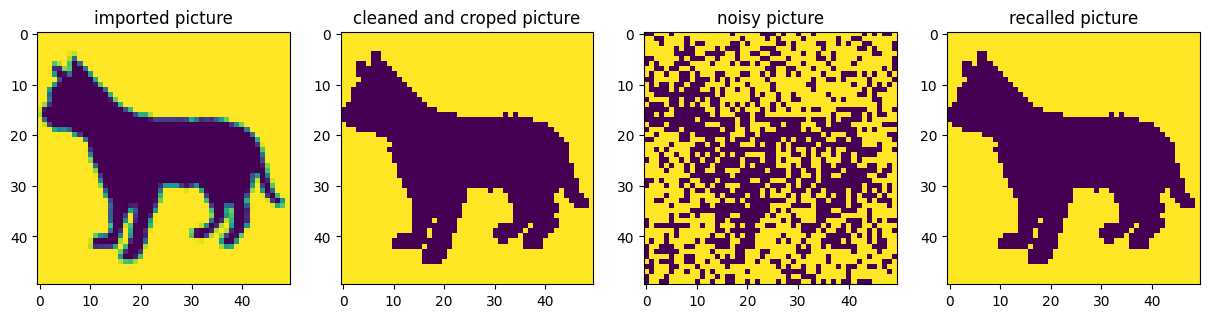

In [21]:
# оригинал

import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector),len(vector)])

    for i in range(len(vector)):
        for j in range(len(vector)):
            if (i!=(i-j)):
                coefMat[i][i-j] = vector[i]*vector[i-j]

    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)):
        temp = 0
        for j in range(len(curuptedVec)):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] == vmax):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])

    for i in range(len(image)):
        for j in range(len(image)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1


    return cleanImage,noisyImage

#Import the image
image = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()

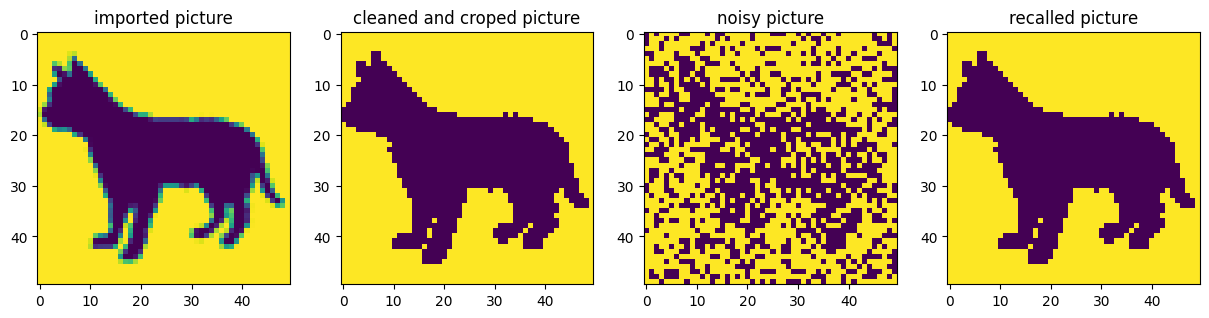

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img


def trainer(vector):
    vector = vector.flatten()
    coefMat = np.outer(vector, vector)
    np.fill_diagonal(coefMat, 0)
    return coefMat


# предсказание восстановления изображения
def prediction(corruptedVec, coefMat):
    corruptedVec = corruptedVec.flatten()
    predictVec = np.sign(corruptedVec @ coefMat)
    predictVec[predictVec == 0] = 1
    side = int(np.sqrt(len(predictVec)))
    return predictVec.reshape((side, side))


def imageGenerator(imageVector, vmax=1):
    cleanImage = np.where(imageVector == vmax, 1, -1)
    noisyImage = cleanImage + np.random.normal(0, 2, cleanImage.shape) # распределение по норм. закону
    noisyImage = np.where(noisyImage >= 0, 1, -1)
    return cleanImage, noisyImage


image = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()
